In [1]:
import sys
import argparse
import csv
import math
import aubio
import numpy as np
import matplotlib.pyplot as plt

In [69]:
name = "philadelphia"

In [70]:
filename = "../samples/%s.wav" % name

In [71]:
SAMPLE_RATE = 44100
WINDOW_SIZE = 4096 # fft size
HOP_SIZE = 1024
TOLERANCE = 0.8
METHOD = 'yinfft'

In [72]:
pitches = []
s = aubio.source(filename, SAMPLE_RATE, HOP_SIZE)
pitch_o = aubio.pitch(METHOD, WINDOW_SIZE, HOP_SIZE, SAMPLE_RATE)
pitch_o.set_unit("Hz")
pitch_o.set_tolerance(TOLERANCE)
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitches += [pitch]
    total_frames += read
    if read < HOP_SIZE: 
        print("read %s frames with method %s" % (total_frames, METHOD))
        break    

read 154759 frames with method yinfft


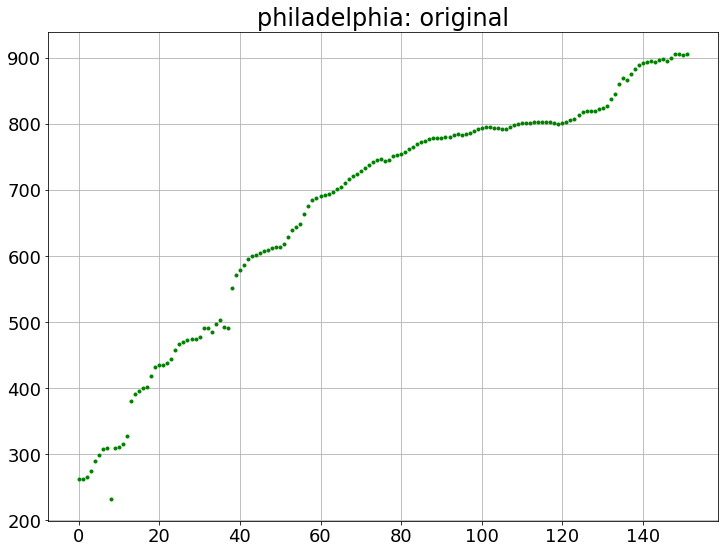

In [73]:
pitches = np.array(pitches)
fig = plt.figure(figsize=(12, 9), frameon=True)
plt.title(name + ": original", fontsize=24)
#ax = fig.add_axes([0,0,1,1])
ax = fig.gca()
ax.tick_params(labelsize=18)
ax.plot(pitches, '.g', color="green")
plt.grid()
plt.show()

In [74]:
image_path = "../output/images/%s_original.png" % name
fig.savefig(image_path, pad_inches=1, dpi=300)

In [87]:
corrected = [pitches[0]]
# first, identify all the outliers and move them closer to the correct position
for i in range(1, len(pitches)-1):
    diff = abs(pitches[i]-corrected[i-1]) / corrected[i-1]
    if diff > 0.4:
        corrected += [corrected[i-1]]
        print(1, i, pitches[i], corrected[i-1], diff, average)        
    elif diff > 0.25:
        average = (corrected[i-1] + pitches[i+1]) / 2
        print(1, i, pitches[i], corrected[i-1], diff, average)
        corrected += [average]
    else:
        corrected += [pitches[i]]

1 9 309.75653 232.96483 0.32962787 272.104248046875


In [90]:
# then iterate over the corrected array, gradually bringing the outliers into line
for x in range(2,20):
    arr = corrected
    for i in range(1, len(arr)-1):
        diff = abs(arr[i] - arr[i+1]) / arr[i+1]
        threshold = 1 - 0.06 * x
        if diff > threshold:
            average = (arr[i-1] + arr[i+1]) / 2
            print(x, i, threshold, arr[i], corrected[i-1], diff, average)
            corrected[i] = average

12 9 0.040000000000000036 311.07163246907294 299.0374120650813 0.04182968740803015 311.8445620839484
12 10 0.040000000000000036 324.6517121028155 311.8445620839484 0.041343629753280736 325.24870611922233
13 1 -0.040000000000000036 267.7830914258957 262.99542 0.012518567750730706 267.08663603663445
13 2 -0.040000000000000036 271.17784970998764 267.08663603663445 0.008011089000322916 270.22722985595465
13 3 -0.040000000000000036 273.36782367527485 270.22722985595465 0.00695883836874394 272.75535337626934
13 4 -0.040000000000000036 275.28347689658403 272.75535337626934 0.009857858798469014 275.3897767905146
13 5 -0.040000000000000036 278.02420020475984 275.3897767905146 0.015806643328193395 278.93959316797554
13 6 -0.040000000000000036 282.4894095454365 278.93959316797554 0.023956793774299108 284.18132561445236
13 7 -0.040000000000000036 289.4230580609292 284.18132561445236 0.03215100725276371 291.60936883976683
13 8 -0.040000000000000036 299.0374120650813 291.60936883976683 0.04106901827

15 131 -0.19999999999999996 837.8578458137242 832.9705399287405 0.006978824995394094 838.3583714165311
15 132 -0.19999999999999996 843.7462029043218 838.3583714165311 0.007209403633277541 844.1158269255309
15 133 -0.19999999999999996 849.8732824345308 844.1158269255309 0.007228248298839499 850.0884657917542
15 134 -0.19999999999999996 856.0611046579775 850.0884657917542 0.007017681112775154 856.099795706559
15 135 -0.19999999999999996 862.1111256213638 856.099795706559 0.0065773724278125655 861.9594453578828
15 136 -0.19999999999999996 867.8190950092066 861.9594453578828 0.005969041097698827 867.4948468997861
15 137 -0.19999999999999996 873.0302484416893 867.4948468997861 0.005278534746446193 872.5789350525679
15 138 -0.19999999999999996 877.6630232053498 872.5789350525679 0.004542327656286691 877.1233912525299
15 139 -0.19999999999999996 881.667847452492 877.1233912525299 0.003830920186290362 881.0909134661571
15 140 -0.19999999999999996 885.0584356797842 881.0909134661571 0.003251943

18 41 -0.43999999999999995 573.9535431753644 565.656910037125 0.011946930617529787 573.275173398823
18 42 -0.43999999999999995 580.8934367605208 573.275173398823 0.01053586154927003 580.1769956516472
18 43 -0.43999999999999995 587.0788179044714 580.1769956516472 0.00936476219295196 586.4028199390151
18 44 -0.43999999999999995 592.628644226383 586.4028199390151 0.00851657270278832 592.0609914361848
18 45 -0.43999999999999995 597.7191629333547 592.0609914361848 0.008025456212204197 597.3079663329127
18 46 -0.43999999999999995 602.5549412296405 597.3079663329127 0.007886563295503248 602.3263854026095
18 47 -0.43999999999999995 607.3448044723064 602.3263854026095 0.008064700257640002 607.3045330841175
18 48 -0.43999999999999995 612.2826807656254 607.3045330841175 0.008490616027979951 612.4151943888937
18 49 -0.43999999999999995 617.5258556936701 612.4151943888937 0.0090589632066838 617.7931672562049
18 50 -0.43999999999999995 623.1711401235162 617.7931672562049 0.009638981322055356 623.514

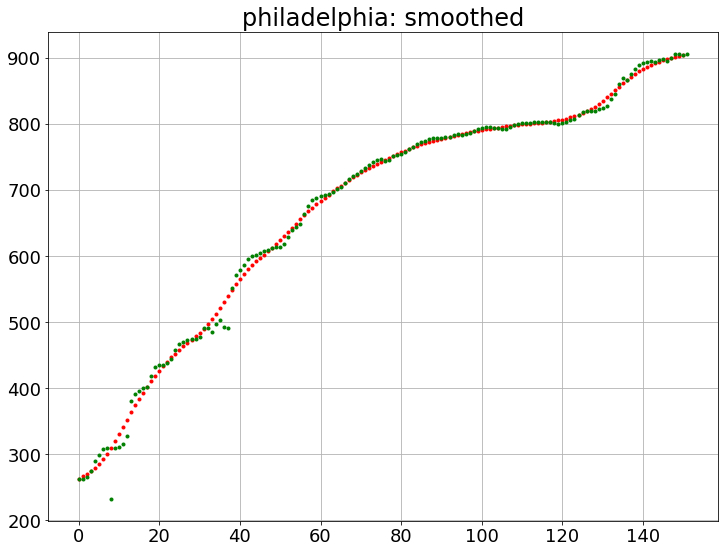

In [91]:
fig = plt.figure(figsize=(12, 9), frameon=True)
plt.title(name + ": smoothed", fontsize=24)
#ax = fig.add_axes([0,0,1,1])
ax = fig.gca()
ax.tick_params(labelsize=18)
ax.plot(corrected, '.g', color="red")
ax.plot(pitches, '.g', color="green")
plt.grid()
plt.show()

In [229]:
image_path = "../output/images/%s_smoothed.png" % name
fig.savefig(image_path, pad_inches=1, dpi=300)

In [230]:
data_path = "../output/data/%s.csv" % name

with open(data_path, "w") as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["freq"])    
    spamwriter.writerows(map(lambda x: [x], corrected))